# Experiments with t-SNE and UMAP

@LaurentMombaerts 05/05/2021

**Ressources** 

- https://scikit-learn.org/stable/modules/manifold.html#manifold
- https://lvdmaaten.github.io/tsne/
- https://distill.pub/2016/misread-tsne/
- https://umap-learn.readthedocs.io/en/latest/index.html
- https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
- https://pair-code.github.io/understanding-umap/

In [2]:
from collections import OrderedDict
from functools import partial
from time import time
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
import umap

## Experiments with 2D datasets

Why testing with 2D datasets? What is the algorithm going to do?


<Figure size 432x288 with 0 Axes>

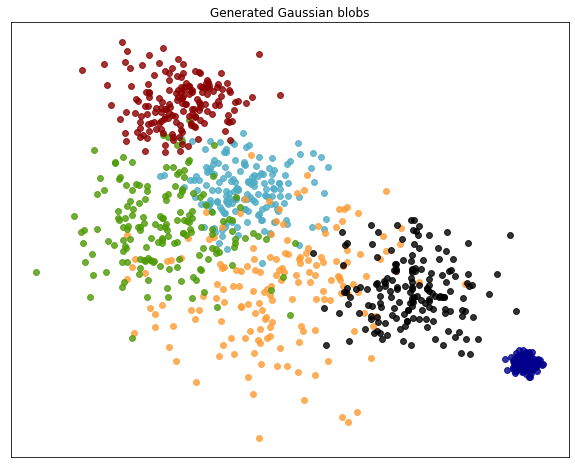

In [133]:
# Load dataset
n_samples = 1000
n_components = 6
cluster_std = [1, 2, 1.5, 1, 0.2, 1.2]

X, y_true = datasets.make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=cluster_std,
                       random_state=0)

# Plot init seeds along side sample data
plt.figure()
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'darkred','darkblue','black']

plt.figure(figsize=(10,8))
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=140, alpha=0.8)

plt.title('Generated Gaussian blobs')
plt.xticks([])
plt.yticks([])
plt.show()

Total explained variance in 2D : 1.0
Max explained variance with current components : 1.0


Text(0.5, 1.0, 'PCA')

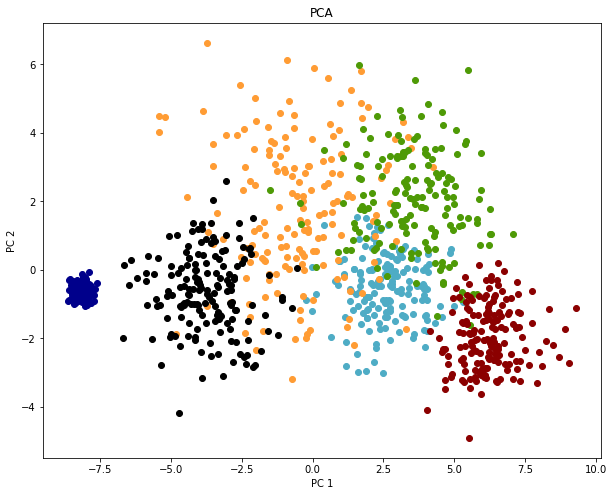

In [138]:
# PCA, tSNE, UMAP
from sklearn import decomposition

# PCA
pca = decomposition.PCA(n_components = 2)
pca_result = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[1]))
print('Max explained variance with current components : ' + str(explained_var[-1]))


plt.figure(figsize=(10,8))

for i in np.unique(y_true):
    idx_yi = y_true == i
    plt.scatter(pca_result[idx_yi,0], pca_result[idx_yi,1], c=colors[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')

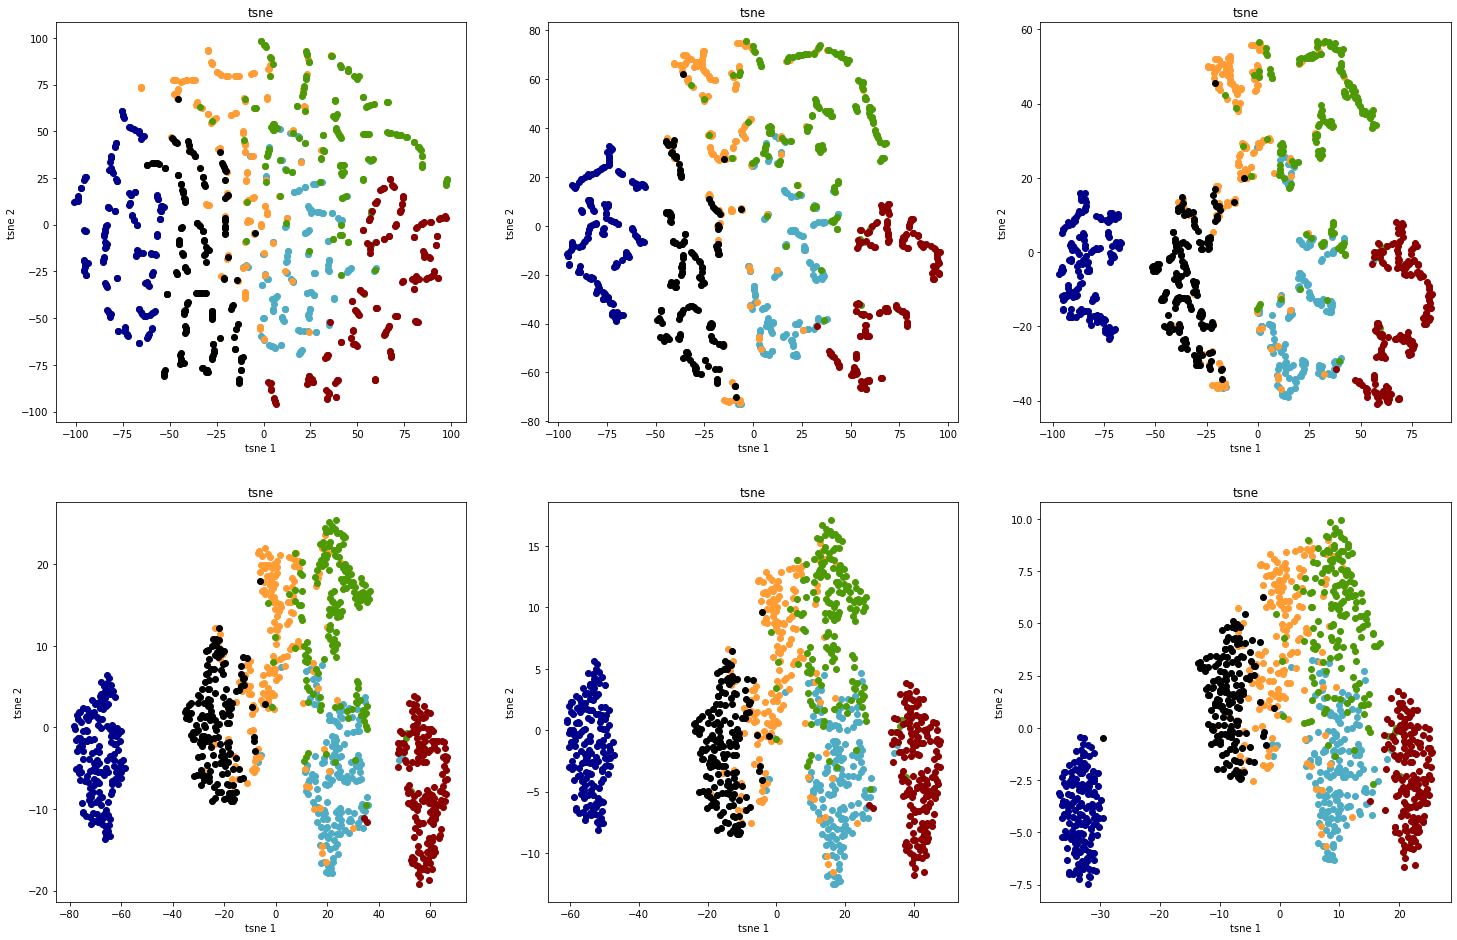

[0.48682868480682373, 0.47469714283943176, 0.47230473160743713, 0.3856269419193268, 0.3217921555042267, 0.23098644614219666]


In [139]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(25,25))

perplexities = [2, 5, 10, 30, 50, 100]
kl_div = []
for i in range(6):
    
    tsne = manifold.TSNE(n_components=2, init='pca', perplexity=perplexities[i], random_state=0)
    fit_tsne = tsne.fit(X)
    kl_div.append(fit_tsne.kl_divergence_)
    tsne_result = tsne.fit_transform(X)

    plt.subplot(3,3,i+1)
    for j in np.unique(y_true):
        idx_yi = y_true == j
        plt.scatter(tsne_result[idx_yi,0], tsne_result[idx_yi,1], c=colors[j])
        
    plt.title('tsne')
    plt.xlabel('tsne 1')
    plt.ylabel('tsne 2')
    
plt.show()
print(kl_div)

In [ ]:
# UMAP
reducer = umap.UMAP(random_state=0)
umap_result = reducer.fit_transform(X)

n_neighbors = [5,15,30,50,100]
min_dist = [0, 0.01, 0.05, 0.1, 0.5, 1]

plt.figure(figsize=(10,8))

for i in np.unique(y_true):
    idx_yi = y_true == i
    plt.scatter(umap_result[idx_yi,0], umap_result[idx_yi,1], c=colors[i])
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.show()

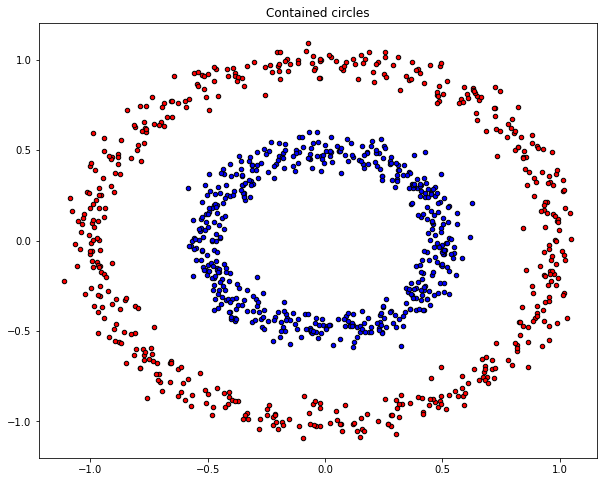

In [122]:
# Contained data example

X, y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

reds = y == 0
blues = y == 1

plt.figure(figsize=(10,8))
plt.scatter(X[reds, 0], X[reds, 1], c="red",  s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.title('Contained circles')
plt.show()

Total explained variance in 2D : 1.0
Max explained variance with current components : 1.0


Text(0.5, 1.0, 'PCA')

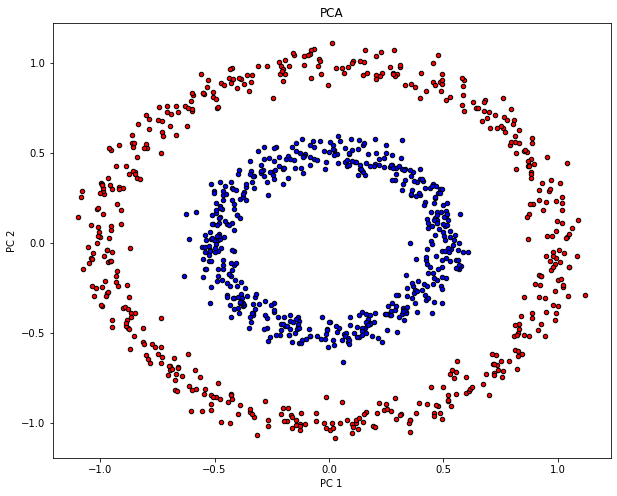

In [123]:
# PCA
pca = decomposition.PCA(n_components = 2)
pca_result = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[1]))
print('Max explained variance with current components : ' + str(explained_var[-1]))


plt.figure(figsize=(10,8))
plt.scatter(pca_result[reds, 0], pca_result[reds, 1], c="red",  s=20, edgecolor='k')
plt.scatter(pca_result[blues, 0], pca_result[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')

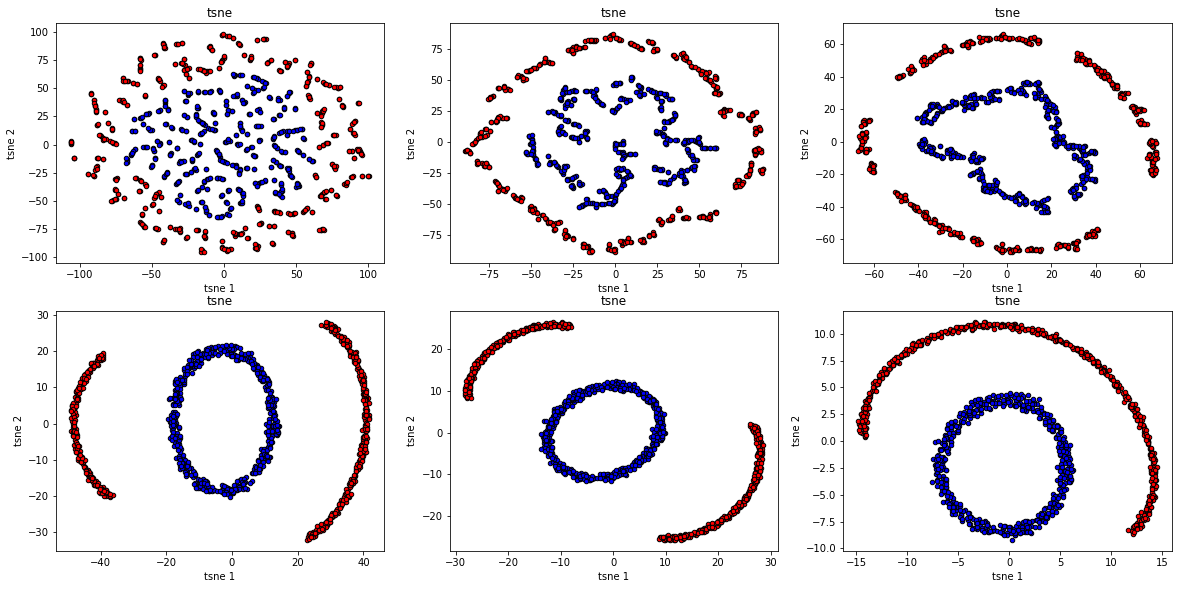

[0.4766030013561249, 0.4029220938682556, 0.354769766330719, 0.2774509787559509, 0.2747025191783905, 0.27718839049339294]


In [132]:
plt.figure(figsize=(20,15))

perplexities = [2, 5, 10, 30, 50, 100]
kl_div = []
for i in range(6):
    
    tsne = manifold.TSNE(n_components=2, init='pca', perplexity=perplexities[i], random_state=0)
    fit_tsne = tsne.fit(X)
    kl_div.append(fit_tsne.kl_divergence_)
    tsne_result = tsne.fit_transform(X)

    plt.subplot(3,3,i+1)
    plt.scatter(tsne_result[reds, 0], tsne_result[reds, 1], c="red",  s=20, edgecolor='k')
    plt.scatter(tsne_result[blues, 0], tsne_result[blues, 1], c="blue", s=20, edgecolor='k')
    plt.title('tsne')
    plt.xlabel('tsne 1')
    plt.ylabel('tsne 2')
    
plt.show()
print(kl_div)

**Few notes**

- Cluster sizes in a t-SNE plot mean nothing (the t-SNE algorithm adapts its notion of “distance” to regional density variations in the data set. As a result, it naturally expands dense clusters, and contracts sparse ones, evening out cluster sizes)
- Distances between clusters might not mean anything (still dependent on hyperparameters)
- Hyperparameters really matter (perplexity, learning rate, iterations) - and topology inference might require several plots (see containment property)
- Random noise doesn't always look random (still dependent on hyperparameters: tune down perplexity)

## Experiments with high-dimensional datasets (here, image pixels = features)

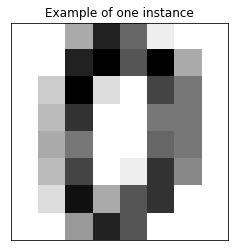

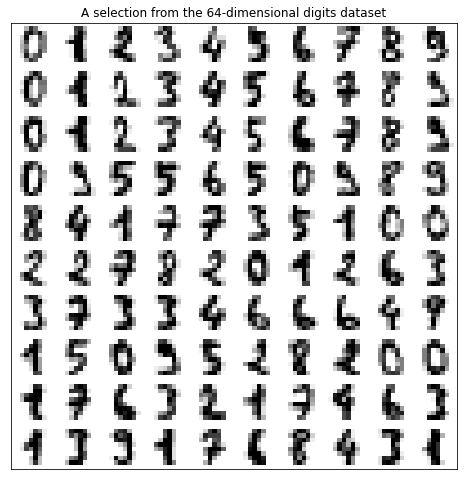

In [95]:
# Load dataset
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

plt.figure(figsize=(4,4))
plt.imshow(X[0,0:64].reshape(8,8), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Example of one instance')
plt.show()

colors_digits = ['#4EACC5', '#FF9C34', '#4E9A06', 'darkred','darkblue','black',
                'firebrick','darkslategray','aqua','deeppink']

plt.figure(figsize=(8,10))
# Plot images of the digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [96]:
print(X.shape)
print('')
print(X)
print('')
print(y)

(1797, 64)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

[0 1 2 ... 8 9 8]


Total explained variance in 2D : 0.28509364823697236
Max explained variance with current components : 0.28509364823697236


Text(0.5, 1.0, 'PCA')

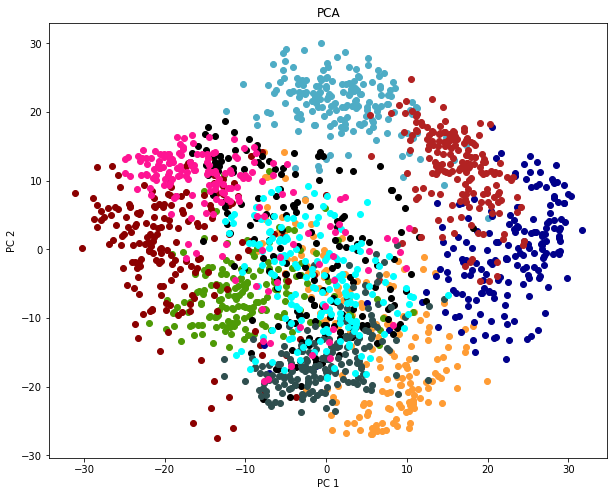

In [97]:
# PCA
pca = decomposition.PCA(n_components = 2)
pca_result = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_.cumsum()
print('Total explained variance in 2D : ' + str(explained_var[1]))
print('Max explained variance with current components : ' + str(explained_var[-1]))


plt.figure(figsize=(10,8))

for i in np.unique(y):
    idx_yi = y == i
    plt.scatter(pca_result[idx_yi,0], pca_result[idx_yi,1], c=colors_digits[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')

## Experiments on small datasets